<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Random_Numbers_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Numbers


Random numbers come up all the time in physics.  For example, there are processes which are truly random (such as radioactive decay), processes that appear and act random (such as Brownian dynamics), and calculations that are just made easier by taking random samples (such as Monte Carlo integration).  Here, we'll start to explore how to generate and use random numbers.

## Generating random numbers

Computers are deterministic.  That is, if you give the computer a number and a set of operations to perform, you'll get a result that is completely determined by those inputs.  Since any computer operation requires providing a pre-written routine with a set of inputs, this makes generating truly random numbers by a computer impossible.  However, we can make numbers that LOOK random and that are "random enough" for physics uses.  There have been a host of algorithms developed for generating these *pseudorandom* numbers. 

One well-known algorithm for generating a string a pseudorandom numbers is the linear congruential random number generator.  It is based on the following equation:

$x' = \left(ax +c\right)\mod m$

Where $x'$ is the next random number being generated, $a, x,$ and $m$ are constants, $x$ is the previous random number (or initial value, which we call a seed) and ```mod``` is the modulus operator (that is, the remainder when you do division).  

To see how this works, consider the following code:

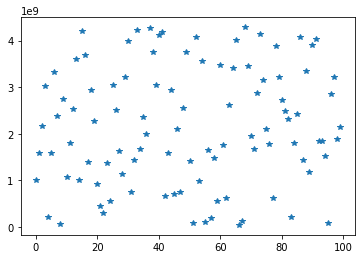

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 #number of random numbers to generate
a = 1664525 #input paramater
c = 1013904223 #input paramater
m = 4294967296 #input paramater

x = 1 #initial seed

results = np.array([]) #results array

for i in range(N): #perform iterations to generate N random numbers
  x = (a*x + c)%m #determine new random number based on formula above
  results=np.append(results,x) #add new random number to the list of results

plt.plot(results,'*')
plt.show()

These number certainly look random.  It's easier to visualize the results of these calculations by plotting a histogram of their results. You can do that with the matplotlib ```hist``` command, which is used below to create 50 bins.

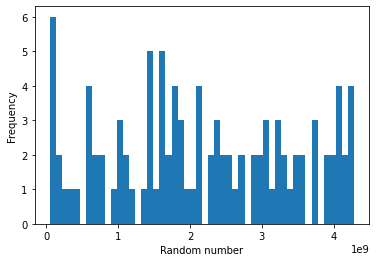

In [2]:
plt.hist(results,bins=50)
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.show()

Note that the random numbers range from 0 to $m$.  This is a result of the modulus operation.  While this is OK, in general we may want random numbers that span a different range.  By convention, most random number generators will create numbers that go from 0 to 1.  We can normalize our results onto that range by dividing our final random numbers by $m$:

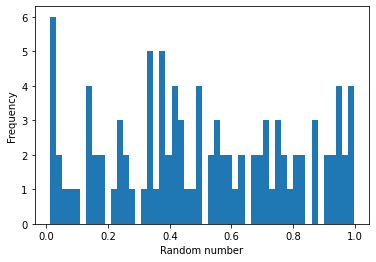

In [3]:
results_normalized = results / m
plt.hist(results_normalized,bins=50)
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.show()

**Activity:** Modify the code above to create a much larger (orders of magnitude) number of random numbers.  Create a histogram of the results.  How many random numbers do you need to generate to create a histogram that looks relatively flat?  How does this change if you use only 5 bins in your histogram? What about 500 bins?

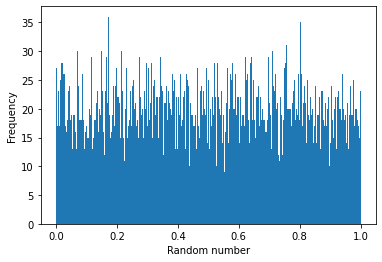

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 #number of random numbers to generate
a = 1664525 #input paramater
c = 1013904223 #input paramater
m = 4294967296 #input paramater

x = 1 #initial seed

results = np.array([]) #results array

for i in range(N): #perform iterations to generate N random numbers
  x = (a*x + c)%m #determine new random number based on formula above
  results=np.append(results,x) #add new random number to the list of results

results_normalized = results / m
plt.hist(results_normalized,bins=500)
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.show()

## Random number in python


The above algorithm is ok, but it turns out the "random" numbers it generates have a high degree of correlation to one another, which makes them less random than you might think.  This is a common problem with random number generators.  To get around this, several algorithms have been developed to generate random numbers, which vary based on their complexity and the degree of randomness they introduce.

Luckily, we don't need to stress out too much about how random numbers are generated.  NumPy has a number of nice, built-in methods for generating numbers that are sufficiently random for our purposes (they aren't random enough for encrypting sensitive information like bank accounts and state secretes, but they're good enough for us).  The basic routine is ```np.random.random()```, which functions like the above code to generate a random number in the range of 0 to 1.  For example, run this code:

for i in range(10):


In [5]:
for i in range(10):
  x = np.random.random()
  print("Random number %i is:"%i, x)

Random number 0 is: 0.048872043956864064
Random number 1 is: 0.7046416491291545
Random number 2 is: 0.4282884778568967
Random number 3 is: 0.7262529995521833
Random number 4 is: 0.387853458869875
Random number 5 is: 0.8086269812766266
Random number 6 is: 0.6062326715073186
Random number 7 is: 0.0931099694041656
Random number 8 is: 0.8977987124917494
Random number 9 is: 0.3118463326783266


If you want to generate an array of random numbers, the ```random.rand``` command will take as an input the size of an array and will return an array of that size that is full of random numbers:

In [6]:
rands = np.random.rand(10)
print("A 1-D array of random numbers:\n", rands)

A 1-D array of random numbers:
 [0.77864397 0.64429442 0.00501484 0.82843519 0.22235509 0.11059355
 0.43342357 0.42037657 0.82638707 0.02285458]


You can even use this to make multidimensional arrays.  For example, to create a 5x5 matrix filled with random numbers from 0 to 1 you can use the following:

In [7]:
rands = np.random.rand(5,5)
print("A 2-D array of random numbers:\n", rands)

A 2-D array of random numbers:
 [[0.25691059 0.58191848 0.1214393  0.84331076 0.43275993]
 [0.72843402 0.14525962 0.64837885 0.05306664 0.89949464]
 [0.06712881 0.67235143 0.98335439 0.47401857 0.67542075]
 [0.66645826 0.44495636 0.03536549 0.3053607  0.95754756]
 [0.09393826 0.5144219  0.92784259 0.85214725 0.93097872]]


**Activity**: Create a 1D array of 10000 random numbers from 0 to 1.  Make a histogram of the resulting random numbers.  How to the results compare to the histogram you made above?

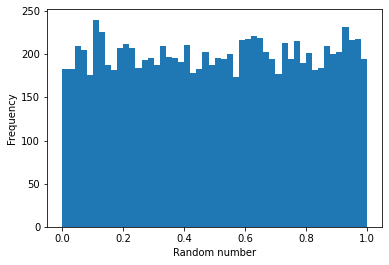

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 #number of random numbers to generate

results_normalized = np.random.rand(N)

plt.hist(results_normalized,bins=50)
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.show()

#Using Random Numbers in Calculations

We often use computers to try to model situations in which there is some probability $p$ that an event will occur.  A general procedure for using  random numbers to model probabilistic events is:

1. Determine how many different outcomes you can have ($N$) and the probabilities for. each outcome $p\left(N\right)$.  Remember that all of the probabilities should add up to 1.  That is:

 $\sum p\left(n\right) = 1$

2.  Divide the number line from 0 to 1 into $N$ regions that each have a **width** corresponding to the desired probability for that outcome.

3.  Create a random number from 0 to 1.  Check where on the number line that random number is, and the outcome that corresponds to that space is the outcome for that occurrence.

For example, if you throw a coin that is equally weighted, you have $N=2$ outcomes, heads and tails.  Since the coin is equally weighted, there is a probability of getting  heads of $0.50$, and a probability of getting tails of $0.50$.  To divide the number line, you get:

$0 \leq x \lt 0.5 \rightarrow \textrm{Heads}$

$0.5 \leq x \lt 1.0 \rightarrow \textrm{Tails}$

Here is some example code that runs this algorithm:

In [9]:
import numpy as np

N = 10 #number of coin flips

for i in range(10):
  x =np.random.random()
  if x<0.5:
    print("Heads")
  else:
    print("Tails")

Heads
Heads
Tails
Tails
Tails
Heads
Heads
Heads
Heads
Heads


If you had a weighted coin that had a probability of coming up heads as 0.2 (and thus, tails of 0.8), you would divide the number line like this:

$0 \leq x \lt 0.2 \rightarrow \textrm{Heads}$

$0.2 \leq x \lt 1.0 \rightarrow \textrm{Tails}$

With resulting code that looks like this:

In [10]:
import numpy as np

N = 10 #number of coin flips

for i in range(10):
  x =np.random.random()
  if x<0.2: #note the change!
    print("Heads")
  else:
    print("Tails")

Heads
Tails
Tails
Tails
Heads
Tails
Tails
Tails
Heads
Tails


For multiple possible outcomes, you divide up the number line into more regions.  For example, if you have a three-sided die that was evenly weighted, the probability of throwing a 1 would be $\frac{1}{3}$, the probability of throwing a 2 would be $\frac{1}{3}$, and the probability of throwing a 3 would be $\frac{1}{3}$.   The number line is then divided into:

$0 \leq x \lt \frac{1}{3}\rightarrow \textrm{Throw of 1}$

$\frac{1}{3} \leq x \lt \frac{2}{3}\rightarrow \textrm{Throw of 2}$

$\frac{2}{3} \leq x \lt 1.0 \rightarrow \textrm{Throw of 3}$

With accompanying code that looks like this (note that this code is slightly modified to save all of the throw values): 

In [11]:
import numpy as np

N = 10 #number of coin flips
results = np.array([])

for i in range(10):
  x =np.random.random()
  if x<1.0/3.0: #note the change!
    results = np.append(results,1)
    print("Die value: 1")
  elif x<2.0/3.0: #note the change!
    results = np.append(results,2)
    print("Die value: 2")
  else:
    results = np.append(results,3)
    print("Die value: 3")

Die value: 1
Die value: 3
Die value: 2
Die value: 3
Die value: 2
Die value: 1
Die value: 2
Die value: 3
Die value: 3
Die value: 2


## Activity

Consider the case where you have a four-sided die.  The die is weighted so that rolling a value of one to three is equally likely, but rolling a four is twice as likely as rolling a three.  Modify the code above (or write your own) to simulate throwing this die a large number of times.  Make a histogram of the results, and show that your code properly reproduces the probabilities of rolling specific values of your die.

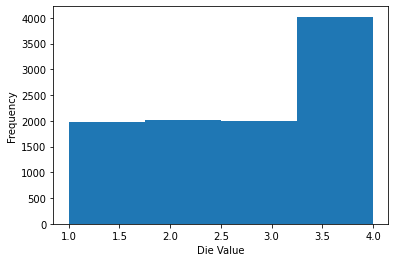

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 #number of coin flips
results = np.array([])

for i in range(N):
  x =np.random.random()
  if x<0.2:
    results = np.append(results,1)
  elif x<0.4:
    results = np.append(results,2)
  elif x< 0.6:
    results = np.append(results,3)
  else:
    results = np.append(results,4)

plt.hist(results,bins=4)
plt.xlabel('Die Value')
plt.ylabel('Frequency')
plt.show()

## Radioactive Decay

Radioactive decay is a classic example of a physical process that is probabilistic in nature.  In general, if we have $N$ atoms of a certain type in a sample, then at some time $t$ in the future we'll have:

$N\left(t\right) = N\left(0\right) 2^{-t/\tau}$

atoms of that type, with $\tau$ being the half life of the sample (the time it takes for half of the atoms to decay).  For a single atom, this means the probability it has NOT decayed over a given time is:

$p_{stable} = \frac{ N\left(t\right) }{N\left(0\right)} = 2^{-t/\tau}$

and the probability it has decayed is:

$p_{decay} = 1-p_{stable} = 1- 2^{-t/\tau}$

Consider the case of $^{208}$Th (thallium 208) which decays to $^{208}$Pb (lead 208) with a half life of 3.053 minutes.  We can simulate the populations of these atoms as a function of time by taking a probabilistic approach.  The algorithm to do this is:

1.  Establish values for the initial number of thallium and lead atoms in a sample.

2.  Perform a "timestep" (similar to how we dealt with differential equations) where for a small time value, we check for each thallium atom if it decays based on the decay probability  and random numbers.

3.  Subtract from the number of thallium atoms the number that decay.  Add that number to the number of lead atoms.

4.  Repeat steps 2-4 for however long we want to simulate.

This is implemented in the code below.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

simulation inputs

In [14]:
N_init_thallium = 100 #initial number of thallium atoms
N_init_lead = 0 #initial number of lead atoms
tau = 3.053 * 60 # half life in seconds
h = 1 #timestep in seconds
tmax = 1000 #Total simulation time

setup initial arrays

In [15]:
N_thallium = np.array([N_init_thallium])
N_lead = np.array([N_init_lead])
time = np.arange(0.0,tmax,h)

Determine the probability of a decay given the timestep size and half life:

In [16]:
p_decay = 1.0 - 2**(-1*h/tau)

For each timestep, determine the number of thallium that decay and append these to the end of the respective arrays. Note that we can skip the first timestep, since we know the values at time $t=0$.

In [17]:
for i in range(len(time)-1):
  decay = 0
  for j in range(N_thallium[i]):
    if np.random.random()< p_decay:
      decay += 1
  N_thallium = np.append(N_thallium,N_thallium[i]-decay)
  N_lead = np.append(N_lead,N_lead[i]+decay)

Plot the results

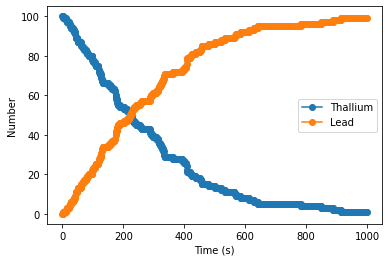

In [18]:
plt.plot(time,N_thallium,'-o',label='Thallium')
plt.plot(time,N_lead,'-o',label='Lead')
plt.xlabel("Time (s)")
plt.ylabel("Number")
plt.legend()
plt.show()

**Activity** By using and modifying the code above, answer the following questions:

1.  One would expect an exponential decay, however there is noise in these results.  How close do you get to a pure exponential decay?  If you increase the number of atoms, is there or or less noise?  How about if you decrease the number of atoms?

2.  Determine how changing the timestep affects the noise in the results.  That is, for a number of atoms that you previously observed had some noise, if you make the timestep smaller or larger, does this make your resulting curves more or less noisy?  Why do you think this is?

3.  Some atoms can decay into multiple different types of atoms with different probabilities.  Think (and discuss with your breakout room) how you would modify your code to account for atoms that have multiple decay targets.

